In [1]:
# !pip install vaderSentiment
import tweepy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#Import sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from api_keys import consumer_key, consumer_secret, access_token, access_token_secret
#
analyzer = SentimentIntensityAnalyzer()

In [2]:
#Instantiate Authentication / Wrapper
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
#Observe 5 different Twitter accounts from Major Media
handles = ['BBC', 'CBSNews', 'CNN', 'FoxNews', 'nytimes']

In [4]:
#Create Empty Lists for Tweets
tweets = []
name = []
full_text = []

In [5]:
#Loop through handles and compile last 100 tweets from each
for i in handles:
    tweets = tweepy.Cursor(api.user_timeline, i, tweet_mode='extended').items(100)
    for j in tweets:
        name.append(j.author.name)
        full_text.append(j.full_text)

In [6]:
#Create DataFrame with Tweets
twitter_df = pd.DataFrame({'Name' : name, 'Tweet Text' : full_text})
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
twitter_df

,Name,Tweet Text
0,BBC,The stories of ordinary people fighting for truth and justice following acts of terror.\n\nIn the Face of Terror starts tonight | 9pm | @BBCTwo &amp; @BBCiPlayer.\n\n👉 https://t.co/99qI8Q4FEz https://t.co/SGEesNSBjX
1,BBC,"""The currency that we deal in is the most valuable thing on the planet. It's human life.""\n\nBrand new #Surgeons: At the Edge of Life | Starts Tuesday | 9pm | @bbctwo &amp; @bbciplayer. https://t.co/EvEQxmx2At"
2,BBC,"@BBCiPlayer @sueperkins These are Japan’s remarkable free-diving grannies, who dive to depths of 30 feet! \n\n#JapanWithSuePerkins is streaming now on.\n\n@sueperkins\nhttps://t.co/E2hn11BROe"
3,BBC,"From A to ""Oh"" to Z.\n\n#GavinAndStacey | @bbcthree\n\nhttps://t.co/PjHtnwrPNV"
4,BBC,"The #GrahamNorton Show is BACK! 🙌\n\nThis week's star studded line up, both in-studio and connecting remotely...\n\n✨ @DollyParton \n✨#RupertEverett \n✨@LollyAdefope\n✨@rizwanahmed\n✨@SaraPascoe\n✨@RoisinMurphy\n\n👉https://t.co/jLmUhRRKDg https://t.co/EFpACyElKJ"
...,...,...
495,The New York Times,"The 2020 election season has divided many military veterans, breaking down close-knit groups that veterans relied on for support.\nhttps://t.co/5R2GjJZbFC"
496,The New York Times,RT @nytgraphics: Mayor Bill de Blasio announced on Sunday that he intended to “rewind” the reopening in nine neighborhoods in New York City…
497,The New York Times,Joe Biden will continue to travel for campaign events despite having shared the debate stage with President Trump shortly before the president tested positive for the coronavirus. \n\nExperts say that the president was likely contagious during the debate. https://t.co/IbAmjzXOtg
498,The New York Times,"Vice President Mike Pence, despite being at high risk of having the coronavirus, has continued campaigning.\n\nThough he has tested negative each of the past three days, it is possible to test negative and still be infected early in the course of the virus.\nhttps://t.co/YXzK1CaP2f"


In [14]:
#Give each tweet an index # that resets once the name of the handle changes
base_name = twitter_df.loc[0,'Name']
counter = 0 
for index, row in twitter_df.iterrows():
    if row['Name'] == base_name:
        twitter_df.loc[index,'Tweets Ago'] = counter
        counter +=1
    if row['Name'] != base_name:
        counter = 0
        twitter_df.loc[index,'Tweets Ago'] = counter
        base_name = row['Name']
        counter +=1

'BBC'

In [22]:
#Analyze the Sentiment of each Tweet
for index, row in twitter_df.iterrows():
    tweet = row['Tweet Text']
    results = analyzer.polarity_scores(f'{tweet}')
    twitter_df.loc[index, 'Compound'] = results['compound']
    twitter_df.loc[index, 'Positive'] = results['pos']
    twitter_df.loc[index, 'Neutral'] = results['neu']
    twitter_df.loc[index, 'Negative'] = results['neg']
twitter_df.head()

,Name,Tweet Text,Tweets Ago,Compound,Positive,Neutral,Negative
0,BBC,The stories of ordinary people fighting for truth and justice following acts of terror.\n\nIn the Face of Terror starts tonight | 9pm | @BBCTwo &amp; @BBCiPlayer.\n\n👉 https://t.co/99qI8Q4FEz https://t.co/SGEesNSBjX,0.0,-0.5574,0.133,0.651,0.216
1,BBC,"""The currency that we deal in is the most valuable thing on the planet. It's human life.""\n\nBrand new #Surgeons: At the Edge of Life | Starts Tuesday | 9pm | @bbctwo &amp; @bbciplayer. https://t.co/EvEQxmx2At",1.0,0.5256,0.091,0.909,0.000
2,BBC,"@BBCiPlayer @sueperkins These are Japan’s remarkable free-diving grannies, who dive to depths of 30 feet! \n\n#JapanWithSuePerkins is streaming now on.\n\n@sueperkins\nhttps://t.co/E2hn11BROe",2.0,0.5983,0.156,0.844,0.000
3,BBC,"From A to ""Oh"" to Z.\n\n#GavinAndStacey | @bbcthree\n\nhttps://t.co/PjHtnwrPNV",3.0,0.0000,0.000,1.000,0.000
4,BBC,"The #GrahamNorton Show is BACK! 🙌\n\nThis week's star studded line up, both in-studio and connecting remotely...\n\n✨ @DollyParton \n✨#RupertEverett \n✨@LollyAdefope\n✨@rizwanahmed\n✨@SaraPascoe\n✨@RoisinMurphy\n\n👉https://t.co/jLmUhRRKDg https://t.co/EFpACyElKJ",4.0,0.3802,0.082,0.918,0.000


In [51]:
#Create Plot Points for Graphs
x = twitter_df.iloc[0:100,2]
#
bbc = twitter_df.loc[twitter_df['Name']=='BBC']['Compound']
cnn = twitter_df.loc[twitter_df['Name']=='CNN']['Compound']
cbs = twitter_df.loc[twitter_df['Name']== 'CBS News']['Compound']
fox = twitter_df.loc[twitter_df['Name']=='Fox News']['Compound']
nyt = twitter_df.loc[twitter_df['Name']=='The New York Times']['Compound']

No handles with labels found to put in legend.


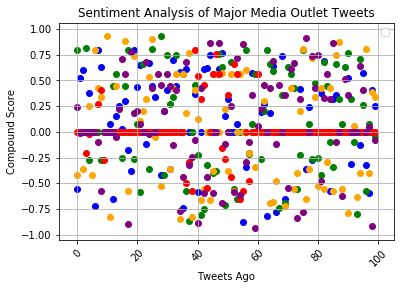

In [54]:
plt.scatter(x,bbc, color = 'blue')
plt.scatter(x,cnn, color = 'green')
plt.scatter(x,cbs, color = 'orange')
plt.scatter(x,fox, color = 'red')
plt.scatter(x,nyt, color = 'purple')
plt.xticks(rotation = 45)
plt.title('Sentiment Analysis of Major Media Outlet Tweets')
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Score")
plt.grid(True)
plt.legend()
plt.savefig('output/tweepy/SentimentbyTweet')

In [12]:
polarity = twitter_df.groupby(['Name']).mean()["Compound"]
pd.DataFrame(polarity)

,Compound
Name,
BBC,0.100738
CBS News,0.015121
CNN,0.091691
Fox News,0.018371
The New York Times,0.088235


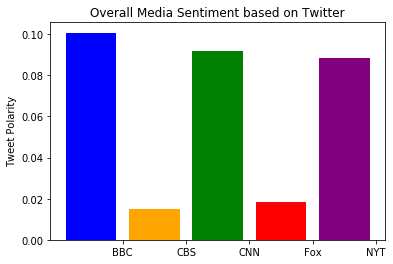

In [13]:
fig, ax = plt.subplots()
x = np.arange(len(polarity))
bbc = ax.bar(x[0], polarity[0], color = 'blue')
cbs = ax.bar(x[1], polarity[1], color = 'orange')
cnn = ax.bar(x[2], polarity[2], color = 'green')
fox = ax.bar(x[3], polarity[3], color = 'red')
nyt = ax.bar(x[4], polarity[4], color = 'purple')
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter")
ax.set_xticks(x + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.grid(False)
plt.savefig('output/tweepy/OverallSentiment')

In [ ]:
#FoxNews does NOT put text in their tweets - only links to articles. Therefore VADER cannot assign a score